# Heart Disease Prediction- A classification project

 ## 1. Problem Definition
 ## 2. Data
 ## 3. Evaluation
 ## 4. Defining features

 ## preparing tools

In [4]:
!pip install seaborn


     ------------------------------------ 288.2/288.2 kB 658.7 kB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to make our plots appear in the notebook
%matplotlib inline 

#Models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data


In [5]:
df= pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data exploration



In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

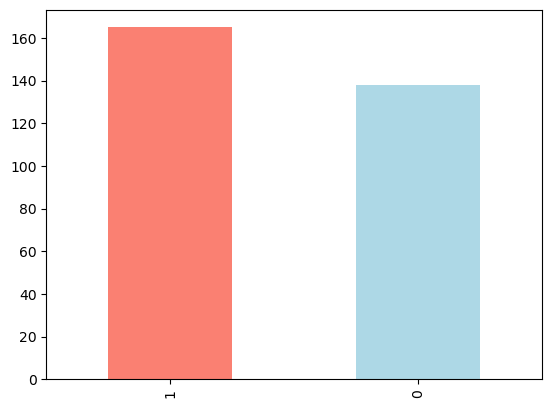

In [8]:
df["target"].value_counts().plot(kind='bar', color=["salmon", "lightblue"] )

In [9]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### are there any missing values


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## HEART Disease Frequency according to sex 

In [12]:
 df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Comparing target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

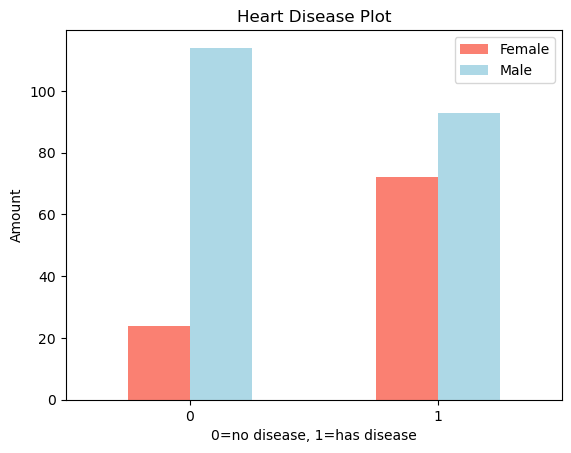

In [14]:
# Creating a plot for crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                     color=["salmon", "lightblue"] 
                                     )

plt.title("Heart Disease Plot")
plt.xlabel("0=no disease, 1=has disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

 ## Age vs Max Heart rate for disease

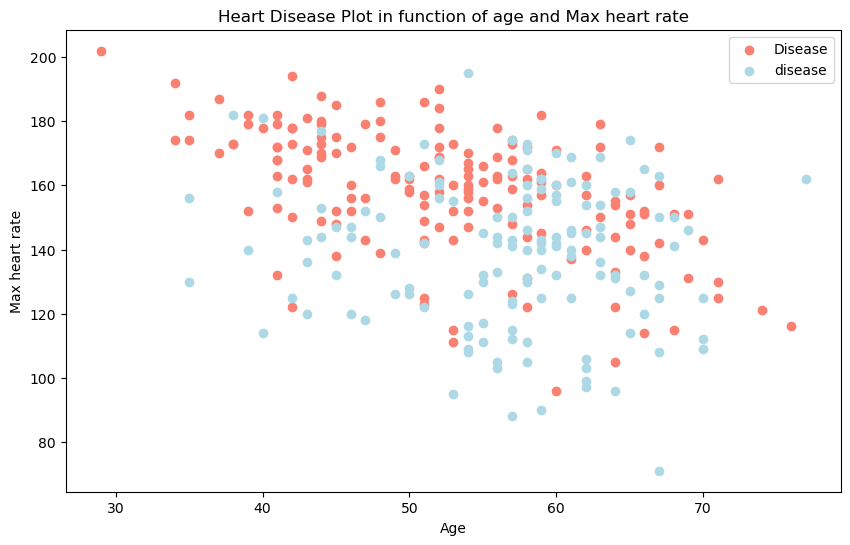

In [15]:
#create another figure
plt.figure(figsize=(10, 6))

#scatter with positive examples
plt.scatter(df.age[df.target==1], 
           df.thalach[df.target==1], 
           c="salmon")

#scatter with negative values

plt.scatter(df.age[df.target==0], 
          df.thalach[df.target==0], 
          c="lightblue");

# Add some help for info
plt.title("Heart Disease Plot in function of age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","disease"])
plt.xticks(rotation=0);

<AxesSubplot:ylabel='Frequency'>

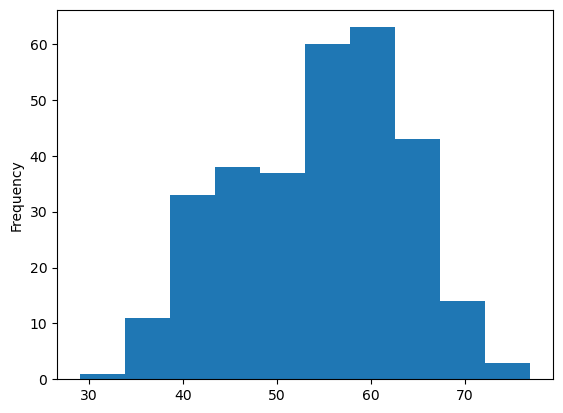

In [16]:
df.age.plot.hist()

# Heart diseasr frequencey per chest pain

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


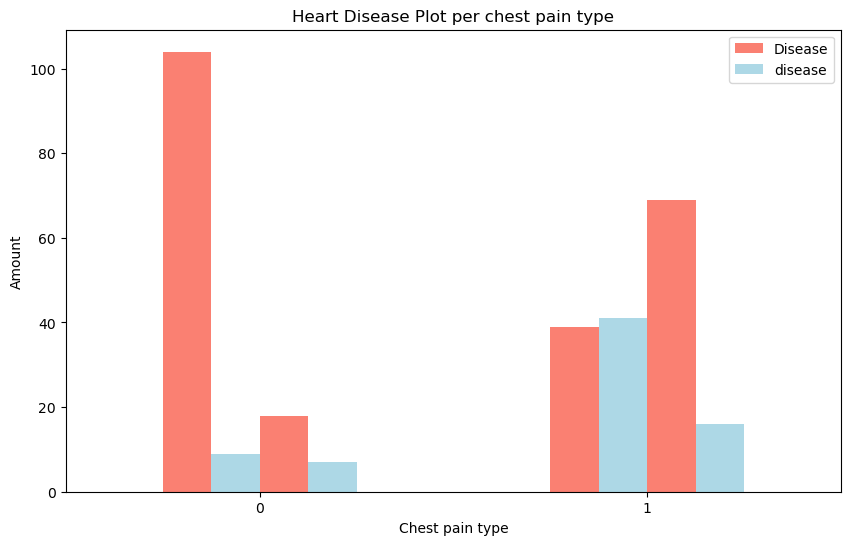

In [18]:
pd.crosstab(df.target, df.cp).plot(kind="bar", 
                                   figsize=(10,6),
                                     color=["salmon", "lightblue"] 
                                     )

# Add some help for info
plt.title("Heart Disease Plot per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["Disease","disease"])
plt.xticks(rotation=0);

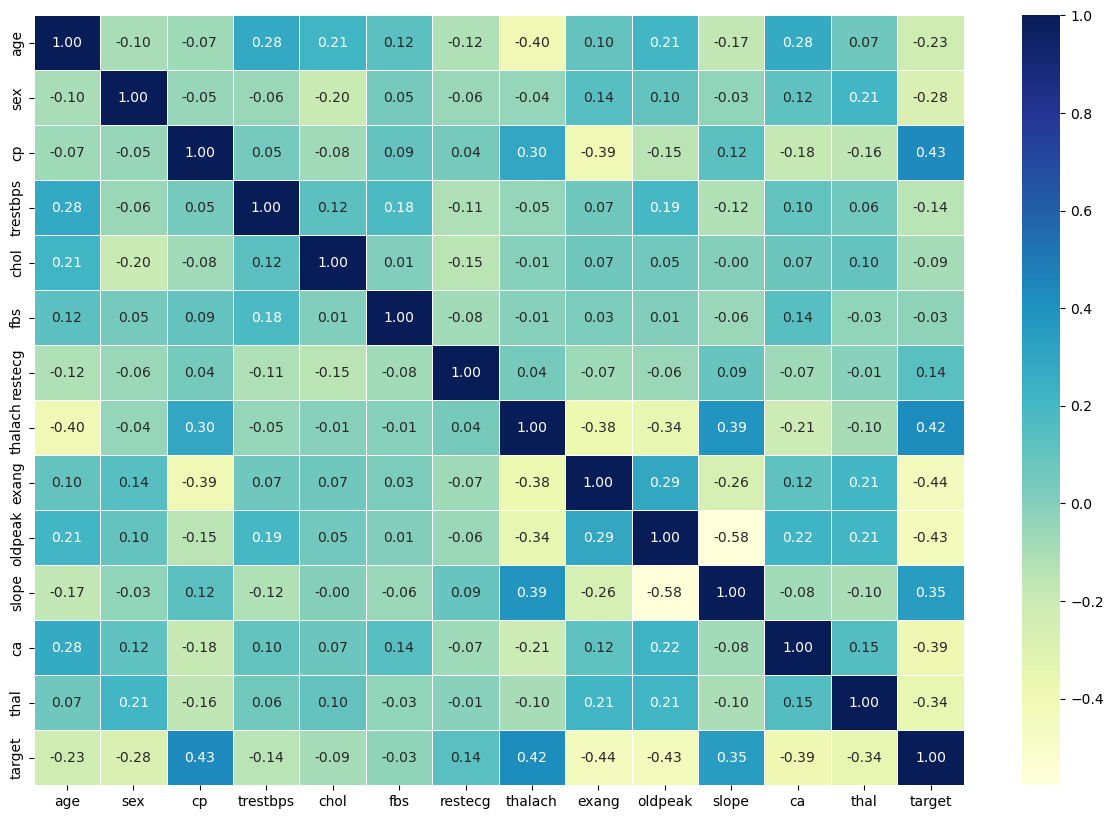

In [19]:
# Correlation matrix
corr_matrix= df.corr()
fig, ax=plt.subplots(figsize=(15, 10))
ax= sns.heatmap(corr_matrix, 
                annot=True, 
                linewidth=0.5, 
                fmt=".2f", 
                cmap="YlGnBu");

## 5. Modelling

In [20]:
# Split data into x and y
x= df.drop("target", axis=1)
y= df["target"]

In [21]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
# Splitting data into train and test split
np.random.seed(42)

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [23]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [24]:
y_test


179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [25]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

# What model should we use to fit our data in

### We will use 3 different classification models to see which fits best.
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [26]:
# Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier() ,
          "Random Forest": RandomForestClassifier()}

# create a function to fit and score models

def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fit and evaluate given machine learning models
    """
    # Set Random seed
    np.random.seed(42)
    #make a dictionary to keep model scores
    model_scores={}
    #Loop through models
    for name, model in models.items():
        # FIT the model to the data
        model.fit(x_train, y_train)
        #Evaluate the model and append its score to model_score
        model_scores[name]=model.score(x_test, y_test)
    return model_scores
    


In [27]:
models_score= fit_and_score(models=models, 
                            x_train=x_train, 
                            x_test=x_test,
                            y_train=y_train, 
                            y_test=y_test)

models_score

C:\Users\AHMAD PC\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

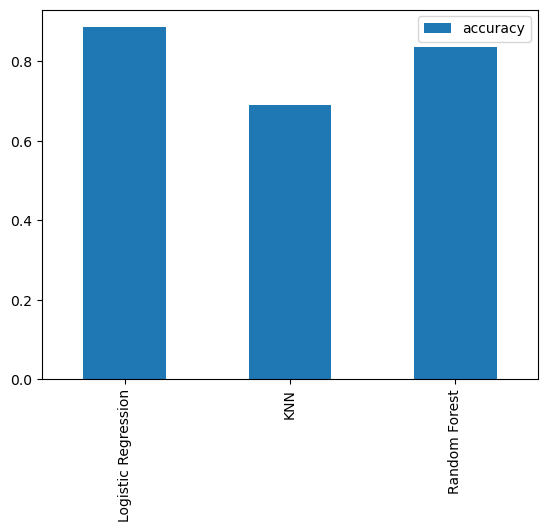

In [28]:
model_compare= pd.DataFrame(models_score, index=["accuracy"])
model_compare.T.plot.bar();

## Experimental SESSION

* Hyperparameter tuning
* Feature importanve
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area Under The Curve

### HYPERPARAMETER TUNING

In [29]:
train_scores=[]
test_scores=[]

# creating a list of values for n-neighbors because default is 5, so we want to
# check for other values

neighbors= range(1, 21)

# Setup KNN instance

knn= KNeighborsClassifier()

# Loop through all values 
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update training score list
    train_scores.append(knn.score(x_train, y_train))
    
    #update the test score list
    test_scores.append(knn.score(x_test ,y_test))


In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

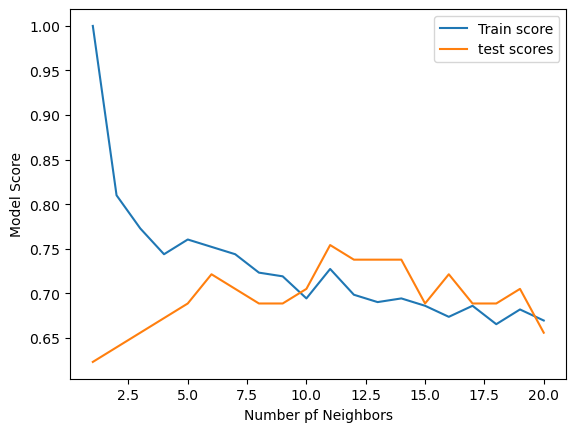

In [32]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="test scores")
plt.xlabel("Number pf Neighbors")
plt.ylabel("Model Score")
plt.legend()



## HyperParameter tuning with Randomised search CV

We are going to tune
* Logisitc Regression()
* RandomForesstClassifier()

In [42]:
# Create hyperparameter grid for LogisticRegressor
log_reg_grid = {"C": np.logspace(-4, 4, 20), 
                 "solver": ["liblinear"]}

# Create hyperparameter grid for RandomForestClassifier
rf_grid= {"n_estimators": np.arange(10, 1000, 50) ,
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2), 
          "min_samples_leaf": np.arange(1, 20, 2)}

In [36]:
# Tune LogisiticRegression
np.random.seed(42)

#setup random hyperparameter search for LogisticRegression

rs_log_reg= RandomizedSearchCV(LogisticRegression(), 
                               param_distributions= log_reg_grid, 
                               cv=5 ,
                               n_iter=20, 
                              verbose=True)

# FIt ranom hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

## Now we try to tune RandomForestClassifier

In [43]:
# Tune RandomForestClassififer
np.random.seed(42)

#setup random hyperparameter search for LogisticRegression

rs_rf= RandomizedSearchCV(RandomForestClassifier(), 
                               param_distributions= rf_grid, 
                               cv=5 ,
                               n_iter=20, 
                              verbose=True)

# FIt ranom hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [44]:
# Finding best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [48]:
# Evaluating the model
rs_rf.score(x_test, y_test)

0.8688524590163934

# We used tuning by hand method and eliminated KNClassififer
## We used RandomizedSearchedCV and eliminated RandomForestClassifier
### Now we will use GridSearchCV on LogisticRegression



In [49]:
# Different Hyperparameters for our LogisticRegression
log_reg_grid 

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'solver': ['liblinear']}

In [51]:
# Create hyperparameter grid for LogisticRegressor
log_reg_grid = {"C": np.logspace(-4, 4, 30), 
                 "solver": ["liblinear"]}

# Create grid hyperparameter search for LogisticRegressiomn
gs_log_reg= GridSearchCV(LogisticRegression(), 
                         param_grid= log_reg_grid ,
                         cv=5, 
                          verbose=True)

# Fit our Grid hyperparamtert
gs_log_reg.fit(x_train, y_train);


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [52]:
# CHeck the best hypeparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [53]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluating tuned machine learning classifier beyon accuracy

* ROC and AUC score
* COnfusion Matrix
* Classification Report
* Precision
* Recall
* F1-score

In [55]:
# make predictions with tuned model
y_preds= gs_log_reg.predict(x_test)

In [56]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\AHMAD PC\Desktop\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


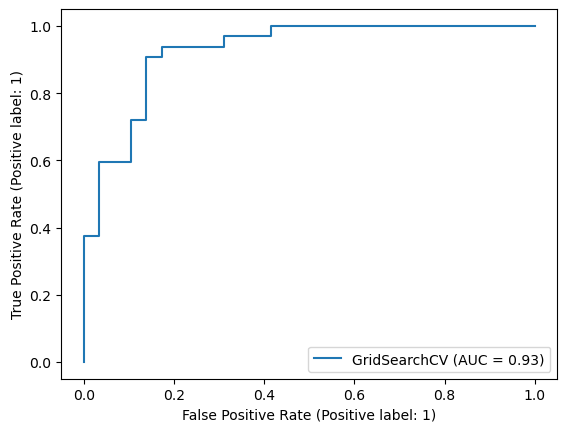

In [60]:
# Plot ROC curve and calculate AUC metric

plot_roc_curve(gs_log_reg, x_test, y_test);

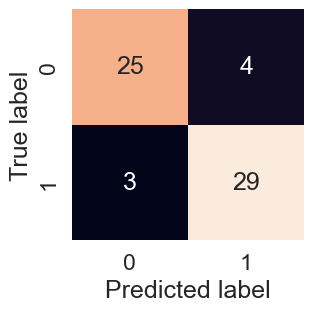

In [61]:
# Confusion Matrix
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

### Lest's now get a classification report, CV precision, recall and F-11 score

* Precision is the measure of No false positives
* Recall is the measure of False negatives

In [62]:
 print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Now we will try to calculate classification report on the basis of Cross Validation

In [65]:
# Check best hyperparametrs
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [67]:
clf = LogisticRegression(C= 0.20433597178569418, 
                         solver='liblinear')

In [68]:
# cross-validated accuracy
cv_acc= cross_val_score(clf, 
                        x, 
                        y, 
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [70]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [72]:
# cross-validated precision
cv_precision= cross_val_score(clf, 
                        x, 
                        y, 
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [73]:
# cross-validated recall
cv_recall= cross_val_score(clf, 
                        x, 
                        y, 
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [74]:
# cross-validated F1
cv_f1= cross_val_score(clf, 
                        x, 
                        y, 
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

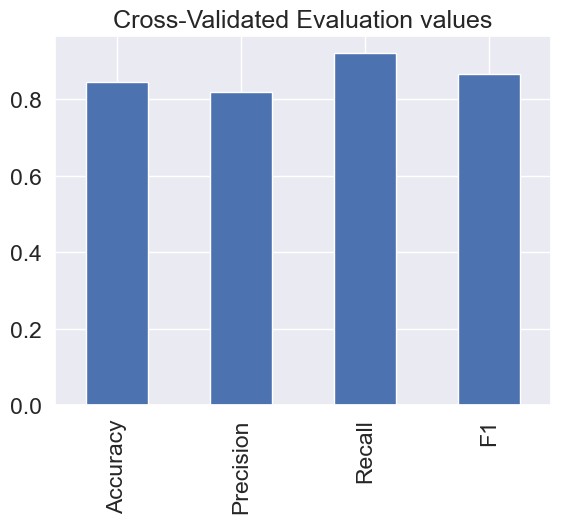

In [83]:
# Visualizing our above evaluations

cv_metrics= pd.DataFrame({"Accuracy":cv_acc, 
                          "Precision":cv_precision, 
                           "Recall": cv_recall, 
                            "F1": cv_f1},
                             index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated Evaluation values" , 
                      legend=False);

### Feature Importance
Which contributed most to the outcomes and how did the contribute

Finding Feature importance is different for each model

In [86]:
# Fit an instance of Logistic Regression
clf = LogisticRegression(C= 0.20433597178569418, 
                         solver='liblinear')
clf.fit(x_train, y_train);

In [88]:
# Check coef
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [89]:
# Matching the coefs to columns
feature_dict= dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

<AxesSubplot:title={'center':'Feature importance Values'}>

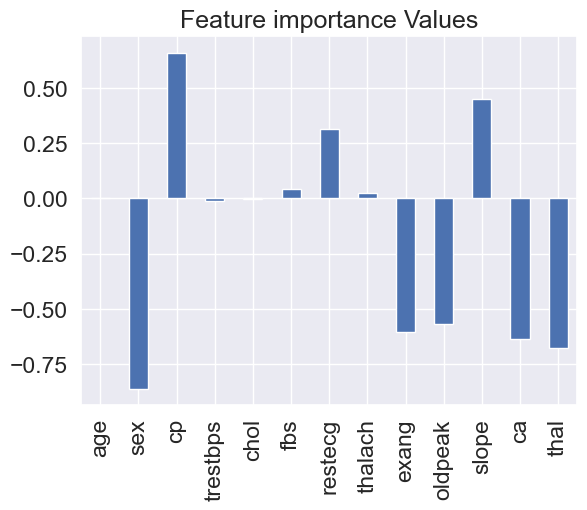

In [90]:
# Visualize feature importance
feature_df= pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature importance Values", legend=False)

# 6. Experimentation
#### We cannot hit our evaluation metric of `95%` after all this process
So we can ask our self

* Could more data be collected
* Could you try a better model? Like Catboost or XGBoost?
* Could you improve the current models?(By tuning more hyperparameters)